In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
startup = pd.read_csv('Startup Funding Cleaned.csv')

In [3]:
startup.head()

,Sr No,date,name,industry_vertical,subvertical,city_loc,investor_name,investment_type,amount,year
0,0,05/09/2019,fpl technologies,fintech,Financial Services,Pune,"Matrix Partners India, Sequoia India",maiden round,4500000.0,2019.0
1,1,04/09/2019,cashflo,fintech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,series a,3300000.0,2019.0
2,2,04/09/2019,digital f5,"advertising,_marketing",Digital marketing firm,Mumbai,TIW Private Equity,private equity,6000000.0,2019.0
3,3,04/09/2019,3rdflix,saas,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series a,5000000.0,2019.0
4,4,04/09/2019,75f,iot,Building automation system,Burnsville,Breakthrough Energy Ventures,series a,18000000.0,2019.0


In [4]:
startup.describe()

,Sr No,amount,year
count,2029.000000,2.029000e+03,2028.000000
mean,1486.070971,1.699118e+07,2016.277120
std,931.549658,1.192485e+08,1.149475
min,0.000000,1.600000e+04,2015.000000
25%,637.000000,4.500000e+05,2015.000000
50%,1462.000000,1.500000e+06,2016.000000
75%,2325.000000,7.600000e+06,2017.000000
max,3057.000000,3.900000e+09,2019.000000


In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
Sr No                2029 non-null int64
date                 2029 non-null object
name                 2029 non-null object
industry_vertical    1898 non-null object
subvertical          1382 non-null object
city_loc             1894 non-null object
investor_name        2010 non-null object
investment_type      2029 non-null object
amount               2029 non-null float64
year                 2028 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 158.6+ KB


# What do we want to know?
1. What series startups are investors typically looking to jump into? In other words, what stage are Indian startups mostly in?
2. What type of startups get the most funding? (by volume and by $$)
3. Who is spending the most on startups in India?
4. How has funding changed over the years?

## 1. What series startups are investors typically looking to jump into? 

year_funding = startup.groupby('year').agg({'amount':'sum'}).sort_index()

In [10]:
year_funding.drop(2019.0,axis=0,inplace=True) #removing 2019 as the year hasn't completed yet

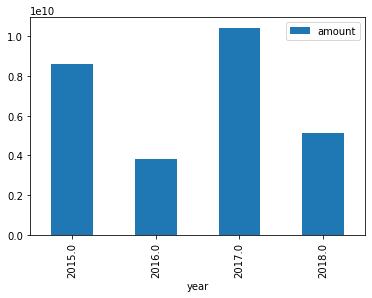

In [11]:
year_funding.plot(kind='bar')

There was a funding boom in 2017 with over $1bn of funds pouring into startups after a significant dip in 2016. Let's take a look at what the spread looks like

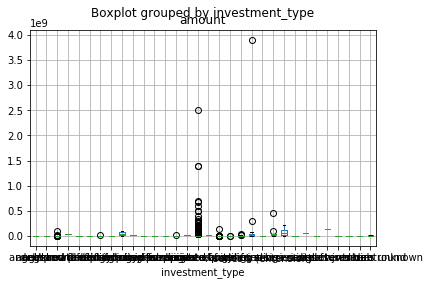

In [29]:
startup.boxplot(by='investment_type', column=['amount'])

Yeah... That didn't help. Too many unicorns aaaah! Let's pick startups who get <1mn funding

748

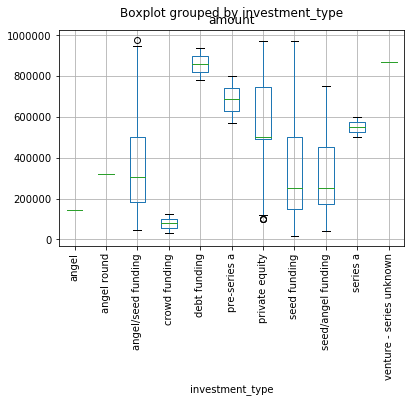

In [38]:
under_1mn=startup[startup['amount']<1000000] # under 1 mill
under_1mn.boxplot(by='investment_type', column=['amount'],rot=90)
len(under_1mn)

876

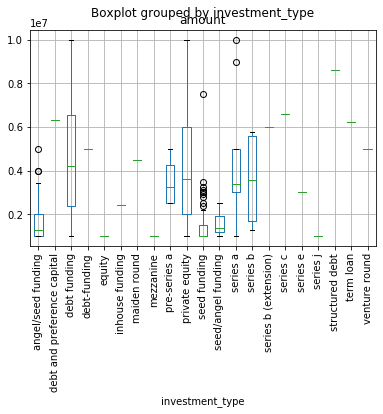

In [36]:
between_1mn_10mn=startup[(startup['amount']>=1000000) & (startup['amount']<=10000000) ] # over 1 mill under 10 mill
between_1mn_10mn.boxplot(by='investment_type', column=['amount'],rot=90)
len(between_1mn_10mn)

419

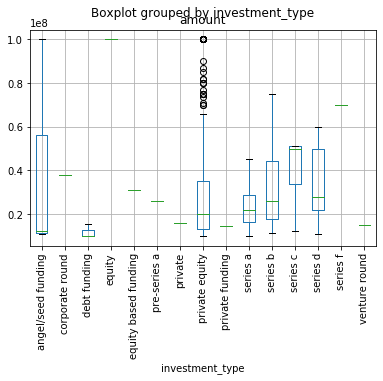

In [37]:
between_10mn_100mn=startup[(startup['amount']>=10000000) & (startup['amount']<=100000000) ] # over 10 mill under 100 mill
between_10mn_100mn.boxplot(by='investment_type', column=['amount'],rot=90)
len(between_10mn_100mn)

63

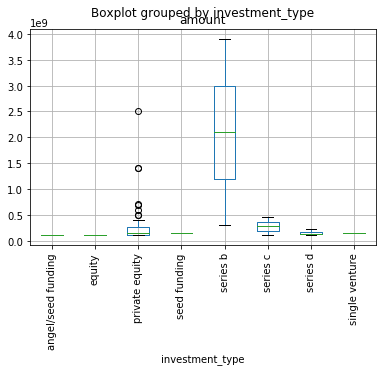

In [41]:
above_100mn=startup[startup['amount']>=100000000]
above_100mn.boxplot(by='investment_type', column=['amount'],rot=90)
len(above_100mn)

In [43]:
under_1mn.groupby('investment_type').agg({'amount':'count'}).sort_values(by='amount',ascending=False)

,amount
investment_type,
seed funding,618
private equity,58
angel/seed funding,46
seed/angel funding,15
crowd funding,2
debt funding,2
pre-series a,2
series a,2
angel,1


In [45]:
print(between_1mn_10mn.groupby('investment_type').agg({'amount':'count'}).sort_values(by='amount',ascending=False))
print(between_10mn_100mn.groupby('investment_type').agg({'amount':'count'}).sort_values(by='amount',ascending=False))

                             amount
investment_type                    
private equity                  654
seed funding                    123
angel/seed funding               43
debt funding                     18
series a                         13
series b                          5
pre-series a                      4
seed/angel funding                3
series b (extension)              1
term loan                         1
structured debt                   1
series j                          1
series e                          1
series c                          1
debt-funding                      1
equity                            1
debt and preference capital       1
mezzanine                         1
maiden round                      1
inhouse funding                   1
venture round                     1
                      amount
investment_type             
private equity           379
series c                   8
series b                   7
series a                   

In [49]:
print(above_100mn.groupby('investment_type').agg({'amount':'count'}).sort_values(by='amount',ascending=False))

                    amount
investment_type           
private equity          51
series d                 4
series b                 2
series c                 2
angel/seed funding       1
equity                   1
seed funding             1
single venture           1


In [47]:
startup.groupby('investment_type').agg({'amount':'median'}).sort_values(by='amount', ascending=False)

,amount
investment_type,
single venture,140000000.0
series f,70000000.0
series d,60000000.0
equity,50500000.0
series c,50000000.0
corporate round,38080000.0
equity based funding,31000000.0
series b,17500000.0
private,15700000.0


1. Expectedly, seed funding for under \$1mn is the most popular as you'd expect companies that need this stage of funding are earlier in their startup life.
2. Private equity firms step in to invest heavily from the mid-sized startups right up till the giants.
3. Startups in India are in small to mid-tier range which is expected. Competition will wean out companies at this stage and fewer companies rise to the >$100mn stage
4. Even though private equity is one of the most common sources of funding, in the mid to late stages of startups, it doesn't have a very high median spend

## 2. What type of startups get the most funding? (by volume and by \$$)

In [55]:
startup['industry_vertical']=startup['industry_vertical'].str.replace('^e-commerce_marketplace$','online_marketplace')
startup['industry_vertical']=startup['industry_vertical'].str.replace('^e-commerce_&_m-commerce_platform$','online_marketplace')
startup['industry_vertical']=startup['industry_vertical'].str.replace('^car_aggregator_&_retail_mobile_app$','cab_aggregator')
startup['industry_vertical']=startup['industry_vertical'].str.replace('^cab_rental_mobile_app$','cab_aggregator')


In [56]:
year_2015=startup[startup['year']==2015.0]
year_2015.groupby('industry_vertical').agg({'amount':'sum'}).sort_values(by='amount',ascending=False).head(5)

,amount
industry_vertical,
online_marketplace,1.880000e+09
cab_aggregator,1.125000e+09
online_classifieds,1.500000e+08
logistics_solution_provider,1.370000e+08
online_food_delivery,1.359770e+08


In [60]:
year_2016=startup[startup['year']==2016.0]
year_2016.groupby('industry_vertical').agg({'amount':'sum'}).sort_values(by='amount',ascending=False).head(5)

,amount
industry_vertical,
consumer_internet,1.918775e+09
e-commerce,9.750466e+08
technology,6.825130e+08
education,8.256500e+07
healthcare,5.240000e+07


In [62]:
year_2017=startup[startup['year']==2017.0]
year_2017.groupby('industry_vertical').agg({'amount':'sum'}).sort_values(by='amount',ascending=False).head(5)

,amount
industry_vertical,
e-commerce,5.937804e+09
consumer_internet,2.595576e+09
technology,9.819217e+08
finance,5.490700e+08
logistics,1.847000e+08


In [63]:
year_2018=startup[startup['year']==2018.0]
year_2018.groupby('industry_vertical').agg({'amount':'sum'}).sort_values(by='amount',ascending=False).head(5)

,amount
industry_vertical,
consumer_internet,1.733483e+09
finance,1.086768e+09
technology,5.362732e+08
food_&_beverage,3.034502e+08
automation,3.000000e+08


In [64]:
startup.groupby('name').agg({'amount':'count'}).sort_values(by='amount',ascending=False).head(20)

,amount
name,
olacabs,12
swiggy,8
oyorooms,8
blackbuck,6
lendingkart,6
flipkart,6
urbanclap,5
grofers,5
paytm,5


In [75]:
print(year_2015.groupby('name').agg({'amount':'sum'}).sort_values(by='amount',ascending=False).head(5))
print(year_2016.groupby('name').agg({'amount':'sum'}).sort_values(by='amount',ascending=False).head(5))
print(year_2017.groupby('name').agg({'amount':'sum'}).sort_values(by='amount',ascending=False).head(5))
print(year_2018.groupby('name').agg({'amount':'sum'}).sort_values(by='amount',ascending=False).head(5))

                amount
name                  
olacabs   1.155000e+09
flipkart  7.500000e+08
paytm     6.800000e+08
snapdeal  5.000000e+08
oyorooms  2.250000e+08
                 amount
name                   
snapdeal    200000000.0
makemytrip  180000000.0
hike        175000000.0
bigbasket   150000000.0
cartrade    145000000.0
                 amount
name                   
flipkart   4.009700e+09
paytm      1.600000e+09
olacabs    8.982000e+08
oyorooms   5.100000e+08
edelweiss  2.700000e+08
                          amount
name                            
true north           600000000.0
bigbasket            300000000.0
automation anywhere  300000000.0
udaan                275000000.0
policybazaar         227700000.0


In [80]:
year_2017[year_2017['industry_vertical']=='technology'].sort_values(by='amount', ascending = False).head(10)

,Sr No,date,name,industry_vertical,subvertical,city_loc,investor_name,investment_type,amount,year
709,949,24/03/2017,delhivery,technology,Tech enabled Fulfilment & Logistics Solutions,New Delhi,"Carlyle Group, Tiger Global",private equity,100000000.0,2017.0
502,631,23/08/2017,dhruva,technology,Cloud data protection and management solutions,Pune,"Riverwood Capital, Sequoia Capital India, Nexu...",private equity,80000000.0,2017.0
344,400,6/12/2017,greenlight planet,technology,Off-grid solar products platform,Mumbai,"Apis Partner, Eight Roads Ventures, Bamboo Cap...",private equity,60000000.0,2017.0
707,946,23/03/2017,markets and markets,technology,Marketing Research Company,Pune,"FTV Capital, Zodius Capital",private equity,56000000.0,2017.0
476,576,19/09/2017,high radius,technology,Integrated receivables software solutions,Hyderabad,Susquehanna Growth Equity LLC,private equity,50000000.0,2017.0
473,571,14/09/2017,smaaash,technology,Virtual Reality gaming and entertainment platform,Mumbai,ECL Finance,private equity,44000000.0,2017.0
570,733,21/06/2017,mswipe,technology,Point-of-Sale services,Mumbai,"UC-RNT Fund, Matrix Partners, alcon Edge Capit...",private equity,31000000.0,2017.0
512,643,30/08/2017,medgenome,technology,Genomics Research and Diagnostics Solutions,Bangalore,"Sequoia India, Sofina s.a., Zodius Capital, Kr...",private equity,30000000.0,2017.0
358,415,13/12/2017,mindtickle,technology,Gamification Platform to train Sales People,Pune,Canaan Partners,private equity,27000000.0,2017.0
359,416,13/12/2017,nazara technologies,technology,Mobile Games Development Firm,Mumbai,Rakesh Jhunjhunwala,private equity,27000000.0,2017.0


In [70]:
top_funded_companies=startup.groupby('name').agg({'amount':'sum'}).sort_values(by='amount',ascending=False).head(10)

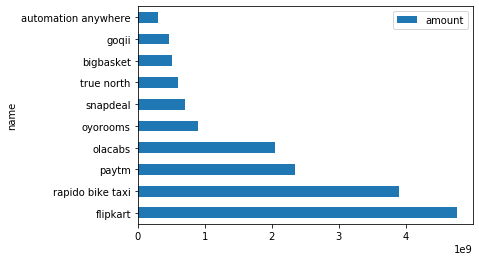

In [71]:
top_funded_companies.plot(kind='barh')

1. Consumer internet and tech companies seem to be winning over a consistent period of time
2. "Technology" companies is a fairly wide category that needs further inspection.
3. Although flipkart did 6 rounds of funding, by amount, it beats olacabs which did 12 rounds of mid-tier funding rounds

## Who is spending the most on startups in India?

In [81]:
startup.groupby('investor_name').agg({'amount':'count'}).sort_values(by='amount', ascending=False)

,amount
investor_name,
Undisclosed Investors,29
Undisclosed investors,24
Group of Angel Investors,14
Sequoia Capital,13
Kalaari Capital,13
undisclosed investors,11
Indian Angel Network,11
Undisclosed Investor,10
Undisclosed,10


In [88]:
startup['investor_name']=startup['investor_name'].str.lower().str.strip()
startup['investor_name']=startup['investor_name'].str.replace(r'^undisclosed investor$','undisclosed')


In [90]:
startup.groupby('investor_name').agg({'amount':'count'}).sort_values(by='amount', ascending=False).head(10)

,amount
investor_name,
undisclosed,94
group of angel investors,16
sequoia capital,13
kalaari capital,13
indian angel network,12
saif partners,12
accel partners,9
info edge (india) ltd,9
trifecta capital,8


In [98]:
top_investor=startup.groupby('investor_name').agg({'amount':'sum'}).sort_values(by='amount', ascending=False).head(10)

In [97]:
startup.groupby('investor_name').agg({'amount':'mean'}).sort_values(by='amount', ascending=False).head(10)

,amount
investor_name,
softbank,2.500000e+09
westbridge capital,1.976000e+09
"microsoft, ebay, tencent holdings",1.400000e+09
steadview capital and existing investors,7.000000e+08
"alibaba group, ant financial",6.800000e+08
"baillie gifford, falcon edge capital, tiger global, softbank group, dst global, didi kuaidi",5.000000e+08
"alibaba, foxconn, softbank",5.000000e+08
softbank group,4.890000e+08
bennett coleman and company ltd (bccl),4.500000e+08


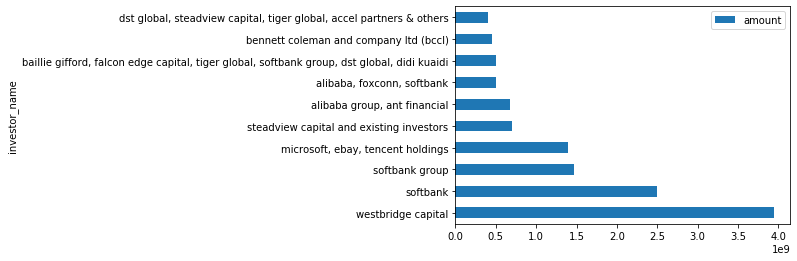

In [99]:
top_investor.plot(kind='barh')